<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 5

# Question 1

Try to denoise the following image by implementing a blur with Robust PCA.

The image (e9gla.png) is blurred by some random points. This question is asking you to remove the noise by Robust PCA. 


Text(0.5, 1.0, 'Original image')

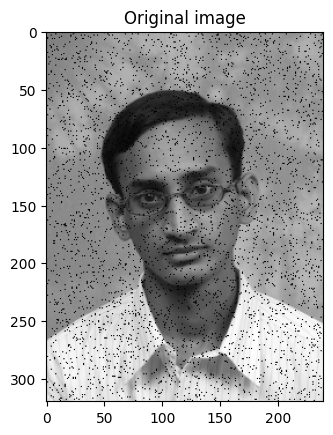

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import fftpack
from scipy.fft import fft2,ifft2,fftshift,ifftshift
from r_pca import *

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

im = plt.imread('e9gla.png').astype(float)

n1, n2 = im.shape
S = np.random.rand(n1, n2)
im[S < 0.05] = 0


plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [ ]:
## answer 1a

In [2]:
rpca = R_pca(im)
L, S = rpca.fit(max_iter=10000, iter_print=100)

iteration: 1, error: 0.10075784488579878
iteration: 100, error: 0.0003276971737926424
iteration: 200, error: 0.0017800275740651552
iteration: 300, error: 0.001380809340483667
iteration: 400, error: 0.0018501888717306545
iteration: 500, error: 0.0015680423934864452
iteration: 600, error: 0.0007649115779939946
iteration: 700, error: 0.0003090783798790783
iteration: 800, error: 0.00012830543500997688
iteration: 900, error: 8.416413925381286e-05
iteration: 1000, error: 4.171597968993652e-05
iteration: 1100, error: 2.918824734102441e-05
iteration: 1200, error: 1.839058602698377e-05
iteration: 1214, error: 1.6235828521077374e-05


Text(0.5, 1.0, 'Reconstructed Image')

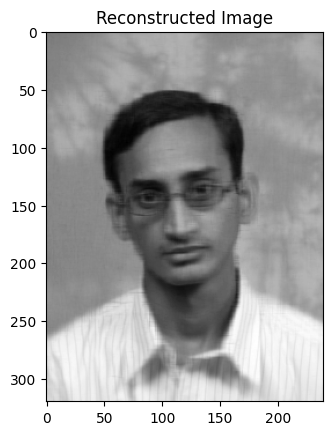

In [3]:
plt.figure()
plt.imshow(L, plt.cm.gray)
plt.title('Reconstructed Image')

# Question 2

In this question, we will create an artificial sound wave, sample 10% of it. This question is asking you to reconstruct the original signal from the sample of 10%. This is one dimensional compressed sensing.




In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy.misc
import cvxpy as cvx

In [5]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1000 * np.pi * t) + np.sin((2000+t*1000) * np.pi * t)
yt = spfft.dct(y, norm='ortho')

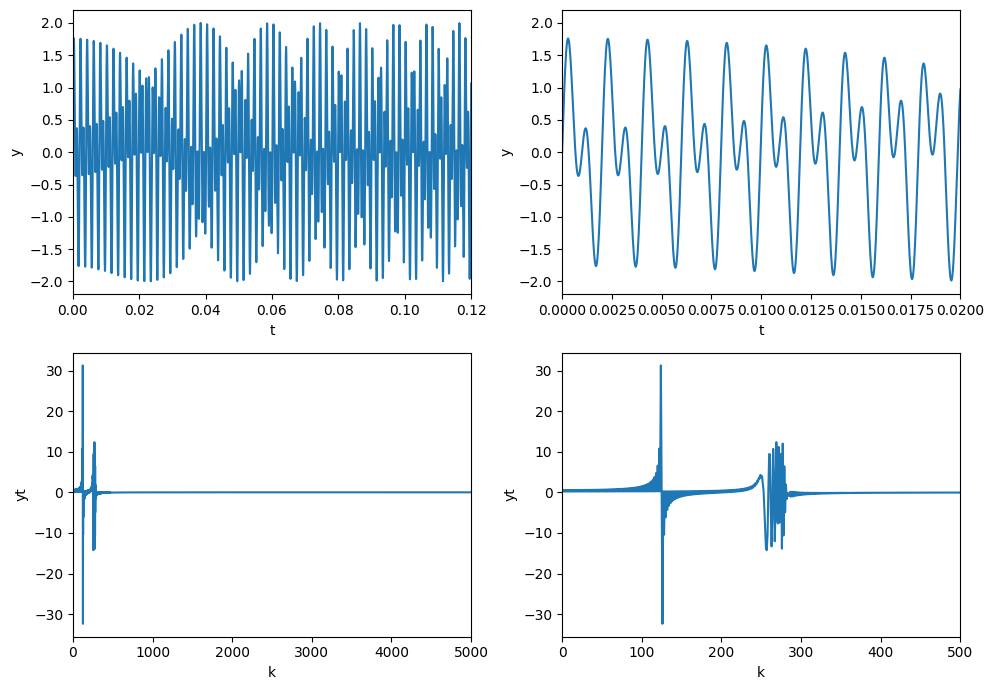

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(t,y)
plt.xlim(0,0.12)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(t,y)
plt.xlim(0,0.02)
plt.xlabel('t')
plt.ylabel('y')

k=np.linspace(0, n-1, n)
plt.subplot(2,2,3)
plt.plot(k,yt)
plt.xlim(0,5000)
plt.xlabel('k')
plt.ylabel('yt')

plt.subplot(2,2,4)
plt.plot(k,yt)
plt.xlim(0,500)
plt.xlabel('k')
plt.ylabel('yt')

plt.tight_layout()
plt.show()

Here is the 10% sample of signal.

In [7]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

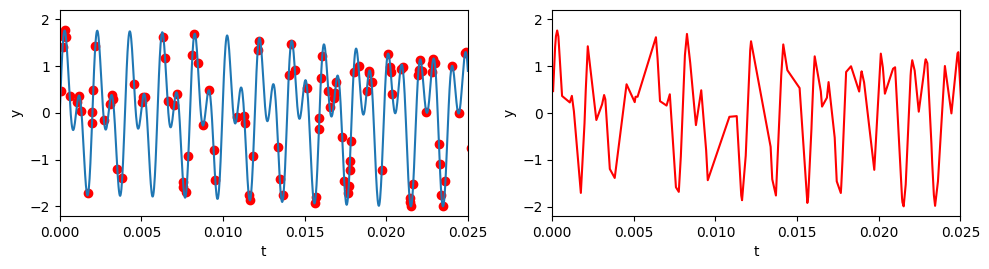

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(t,y)
plt.scatter(t2,y2,color='r')
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(2,2,2)
plt.plot(t2,y2,'r')
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

plt.tight_layout()
plt.show()

Reconstruct the original signal from the sample of 10% and plot the graph of the result for the range $t=0$ to $t=0.025$

In [ ]:
## answer 2



In [9]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A@vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Oct 07 01:59:45 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 07 01:59:45 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 07 01:59:45 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 07 01:59:45 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 07 01:59:45 PM: Compiling problem (target solver=ECOS).
(CVXPY) Oct 07 01:59:45 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

In [10]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

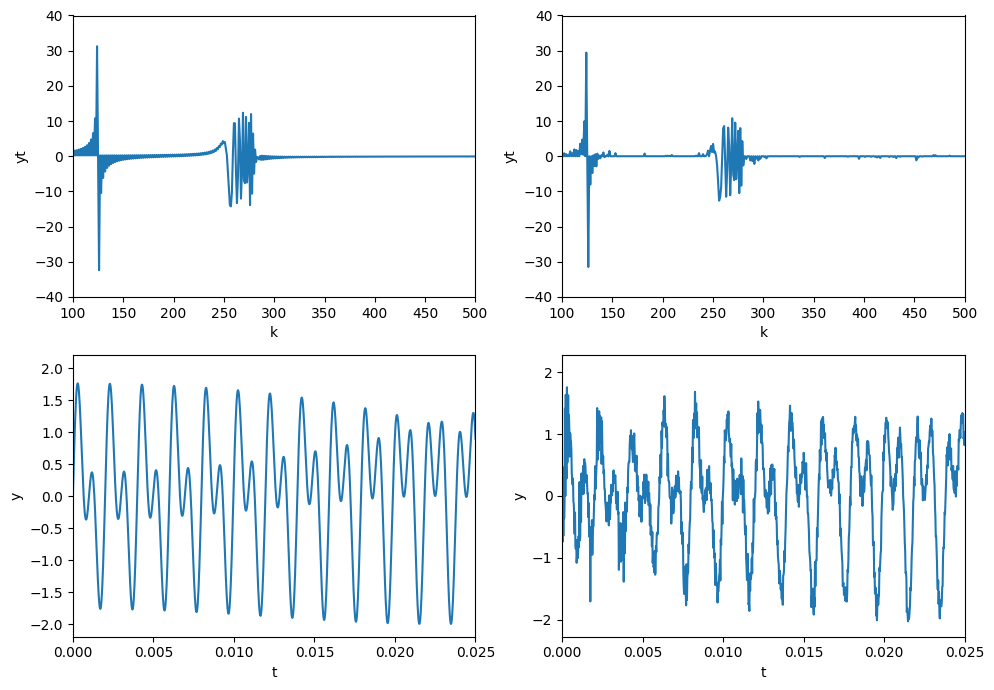

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,3)
plt.plot(t,y)
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

plt.subplot(2,2,4)
plt.plot(t,sig)
plt.xlim(0,0.025)
plt.xlabel('t')
plt.ylabel('y')

k=np.linspace(0, n-1, n)
plt.subplot(2,2,1)
plt.plot(k,yt)
plt.xlim(100,500)
plt.ylim(-40,40)
plt.xlabel('k')
plt.ylabel('yt')

plt.subplot(2,2,2)
plt.plot(k,vx.value)
plt.xlim(100,500)
plt.ylim(-40,40)
plt.xlabel('k')
plt.ylabel('yt')

plt.tight_layout()
plt.show()

## Question 3

In this question, we are going to perform Sparse Representation of Classification (SRC).

Enter

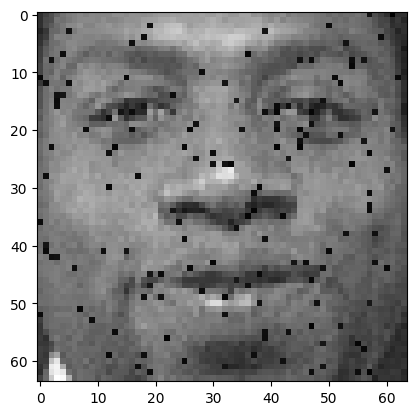

In [13]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd

df = pd.read_csv('face_data.csv')

images = df.iloc[:,:-1]
types = df.iloc[:,-1]

np.random.seed(1234)
corrupted_img = images.iloc[218].values.reshape(64,64)
for _ in range(150):
    corrupted_img[np.random.randint(63),np.random.randint(63)]=0
corrupted_img += np.random.randn(64,64)* 1e-1 * 0.2



plt.imshow(corrupted_img,plt.cm.gray)
plt.show()

You are given two dataframes `images` and `types`.

`images` is a $400\times 4096$ dataframe, with each row containing the pixel value of a $64 \times 64$-pixel image.

`types` is a $400\times 1$ dataframe assigning a class number to the picture of the corresponding row. 

We now have a corrupted $64\times 64$-pixel image `corrupted_img` and we would like to classify it using sparse representation with discrete wavelet transform. 

## Q3a

We will first build an overcomplete library $\Theta$.

$\Theta$ is a 2D matrix with each column being a flattened face data that we have. However, this would make $\Theta$ to be of size $4096\times 400$, which is overdetermined. 

To use compressed sensing, we need $\Theta$ to be underdetermined, so we downsample each image from $64\times 64$ to $16\times 16$ using discrete wavelet transform. As a result, $\Theta$ is a $256 \times 400$ matrix.

Create this $\Theta$ as `Theta`. 

Also note that you should normalize each column vector in $\Theta$. (e.g. via l2 norm)

Hints: You should use `pywt.wavedec2` with 2 levels.

In [14]:
## answer 3a
Theta = np.zeros((256,400))
for i in range(0, len(images)):
    img = images.iloc[i, :].values.reshape(64,64)
    coeffs = pywt.wavedec2(img, 'haar', level=2)
    img = coeffs[0].flatten() / np.linalg.norm(coeffs[0].flatten())
    Theta[:, i] = img

## Q3b

Our corrupted image should correspond to one of the classes in the dataset. After appropriately downsampled to match the columns of $\Theta$, this downsampled image can be sparsely representated as a sum of the columns of $\Theta$ using `cvxpy`.

Recall the formulation of sparse representation:
$$\begin{align*}&\min \|s\|_1 \\
\text{subject to   }&\Theta s = X,\end{align*}$$
where $s$ is the vector of the sparse coefficients and
$X$ is the data.

Using this method and looking at the coefficient vector $s$, which class does our corrupted image belong to?

The picture should belong to class 21.


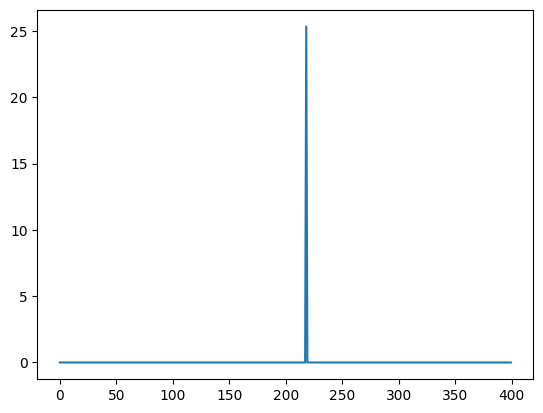

In [15]:
## answer 3b

coeffs = pywt.wavedec2(corrupted_img.reshape(64,64), 'haar', level=2)
cA = coeffs[0]
dwt2_img = cA.flatten()
s = cp.Variable(Theta.shape[1])
constraints = [cp.norm(Theta@s - dwt2_img,2) <= 0]
objective = cp.Minimize(cp.norm(s, 1))
problem = cp.Problem(objective,constraints)
problem.solve()

print(f'The picture should belong to class {types.iloc[np.argmax(s.value)]}.')
plt.plot(s.value)
plt.show()

# Programming 


# Plotting
- make the plot to be in 1:1 aspect ratio
```
plt.gca().set_aspect('equal', adjustable='box')
```
- 3D Plotting of an animated graph (PCA)
```
import plotly.express as px

fig = px.scatter_3d(
    Xtransform_PCA, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
```
- Plotting scatters data
```
for i in range(10):
    plt.scatter(dataset[types==i,0],dataset[types==i,1])
```
- Annotate mean of the data
```
plt.scatter(m[0], m[1], color='k')
plt.annotate('mean', (m[0], m[1]), textcoords="offset points", xytext=(0,10), ha='center')
```
- Annotate PCA and also label each PCA
```
for i in range(2):
    scale=20
    x0 = m[0]-scale*pca.components_[i,0]
    x1 = m[0]+scale*pca.components_[i,0]
    y0 = m[1]-scale*pca.components_[i,1]
    y1 = m[1]+scale*pca.components_[i,1]
    plt.plot([x0, x1],
             [y0, y1],'k') # x0, x1, y0, y1 of PCA(i)
    plt.annotate(f'PCA{i}', (x0, y0), textcoords="offset points", xytext=(0,10), ha='center')
```

# Ch1 
- data imports
	- `df = px.data.iris()`
	- `A = np.array([[1, 2], [3, 4], [5, 6]])`
- data preprocessing:
	- `X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]` # sort out the data column that you want to work on
	- remove unwanted columns for dataset matrix:
		- `df = df.drop(labels＝ df.columns[index],axis =1)` # that means "drop the column with the label specified with `df.columns[index]` along the columns axis (axis = 1)"
		- `X = df.drop('target', axis=0)` # that means dropping a row which its index named as `'target'` from a dataframe 
```python
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
```
- data verification
	- `print('A= ', A)`
	- `print(X.head)` # inspect first few columns 
- data processing
	- PCA
		- ` pca = PCA(n_components=2).fit(A)` # create PCA instances and fit on data
		- `B = pca.transform(A)` # return the same shape data that the first column is align on the first principal axis, the second column align on the second axis, and so on
		- `new_dataset=pca.fit_transform(dataset)` : another way to create PCA dataset. 
	- Truncated SVD
		- Get a smaller size U Sigma V: `u = u[:, :num_components]; sigma = sigma[:num_components]; vt = vt[:num_components, :]`
		- Combine them back together: `X_reduced = X @ vt.T
	- Cumulative explained variance ratio: `explained_variance_ratio = (sigma**2) / (n-1)`
	- PCA by SVD
		- The principal components are the columns of $V$, corresponding to the largest singular values in $\Sigma$. 
		- Transformation of data:
			- By $B = A \times V^T[:,:k]$ (Lab3 Q->A.ipynb)
			- Here, $B$ is the transformed matrix containing the data points in the reduced $k$ dimensional space. 
	- Support vector classification:
		- `from sklearn.svm import SVC` # classifier took x-y-training set data, and then predict test set data
		- `classifier = SVC().fit(X_train_pca, y_train)`
		- `predictions = classifier.predict(X_test_pca)` # feeding PCA processed data into the classifier
	  - Take a test images and represent it using first r PCA modes"
		  - $\tilde x_{test} = \tilde U \tilde U^* x_{test}$



---

# Plotting 2

- plt.rcParams
```
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})
mpl.rcParams.update(mpl.rcParamsDefault)
```
- Setting up figure
```
plt.title('Fourier transform')

```
- Plotting images:
```
im = plt.imread('ex2n.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
```
- Plotting spectrum (Im_FFT , Im_DFT etc)
```
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
```
- Plotting subplots
	- `plt.subplot()`: takes a list of pixel data as input. Return `fig` an figure object, and `axes` a subplot object that contains a list of subplots, depends on the parameters of `subplots()`. `fig` contains the frame and we put our data in `axes`.
```
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()
```
```
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
```
- Changing color of the figure:
```
fig.colorbar(img2,ax=ax2)

matplotlib.cm
```
# Ch2 Transform
### Data preparation
- Cubic interpolation (discrete --> cubic lines) `scipy.interpolate.interpld()`
- Shift data vertically: `g = g - np.ones_like(g)`
- RGB to grayscale: `Abw = np.mean(A, -1); # Convert RGB to grayscale. Mathematically, L = (R+G=B)/3`

- Making grids
	- `np.linspace`: create evenly space values over the interval form parameter 1 to parameter 2. 
	- `np.mashgrid`: takes multiple 1D arrays and return coordinate matrices for these arrays. 
	- both x and y are 2D arrays. `x` represents a specific x-coordinates, `y` represents a specific y-coordinates. 
```
x, y = np.meshgrid(np.linspace(-np.pi, np.pi, 100, endpoint=False), 
                   np.linspace(-np.pi, np.pi, 100, endpoint=False))
```

### Supportive data creation:
- A set of equal length value: 
	- `x = 0.1 + np.arange(1,len(f)+1`
-  initialize arrays to store coefficients
	- `np.zeroes(<ndarray>)`:
- Adding noise: `f = f + 2.5*np.random.randn(len(t))`
- Zoning:
	- `f[index1: index2] = func`: define a function by specifying indexes. 
- Enhancing the visibility of FFT patterns by taking log: `F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale`

### Mathematics: 
- Error between approx. and actual: 
	- `ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)` (In bk fourierSines) `f` represents original function, `fFS` represents Fourier sine.
- Fouries series: 
	- `fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)`
- DFT in low level: 
	- `DFT = np.zeros((n,n))`, 
	- `for i in range(n):` 
	-     `for k in range(n):` 
	-         `DFT[i,k] = w**(i*k)` , 
	- `DFT = np.real(DFT)`
- Function head $\hat f$ (The function after being transformed)
	- Q: Are all transformation involves changing the data from temporal domain to frequency domain
- Zero out small coefficients in FFT


- Power spectrum (PSD) (Power per freqency bandwidth)
- Inverse transforms 
- Find derivatives using fft and for loop: `dx = L/n`, (reference to `SpectralDerivative.ipynb`) (`FFTHeat.ipynb`)
- [[fast fourier transform]]
- Wavelets are easy. We can just use package to settle problems. 
- For loops:
	- Showing evolving Fourier series when $k$ term is getting bigger. 
	- Plotting a series of images 
- [[wavelet transform]]
	- "bior1.3"
```
original = pywt.data.camera()
coeffs2 = pywt.dwt2(original, 'bior1.3') # bior1.3
```

---
# Ch3 Compressed sensing

### Data preparation
- Normalize data with L2 norm:
	- `img = coeffs[0].flatten() / np.linalg.norm(coeffs[0].flatten())`
### Mathematics
- Fitting a line using scipy.optimize.fmin(func = l2_fit, x)

- $\hat s = \underset{s}{argmin} ||s||_1$ , subject to $y = C \Phi s$ 
	- $\underset{s}{argmin}$: that means looking for the argument $s$ that minimizes the following expression
	- $||s||_1$: Target expression, L1 norm of $s$. 
	- $\hat s$: 
		- We store the "optimized" $s$ on this $\hat s$. The hat annotates it is "optimized value".
		- estimated sparse signal that we want to find. When a signal is sparse (most of its elements are zero or close to zero), its $L_1$ norm will be small. 
	- Subject to $y = C \Phi s$: the equation represents the linear measurement process, where the sparse signal $s$ is multiplied by those terms. That equation systems gave a underdetermined system and we are trying to minimize this least square problem.
```python
# do L1 optimization - below is constructing a convex optimization problem: 
vx = cvx.Variable(n) # this contains our s.\
# vx representing an n-dimensional vecor that the optimization problem will solve for
objective = cvx.Minimize(cvx.norm(vx, 1))
# cvx.norm(vx, 1) is the L1 norm of vx.
constraints = [A*vx == y2] 

prob = cvx.Problem(objective, constraints)

result = prob.solve(verbose=True)
```
- $\hat s = \underset{s}{argmin}{||s||_1}$, subject to $||C\Phi s - y ||_2 < \varepsilon$
	- $\varepsilon$: magnitude of noise 
	- $y$: measurement
```python
eps = "..." # noise magnitude

vx = cvx.Variable(n) # this contains our s.\
# vx representing an n-dimensional vecor that the optimization problem will solve for
objective = cvx.Minimize(cvx.norm(vx, 1))
# cvx.norm(vx, 1) is the L1 norm of vx.
constraints = [cvx.norm(A*vx - y2,2) < eps] 

prob = cvx.Problem(objective, constraints)

result = prob.solve(verbose=True)
```

- Denoising an image using Robust PCA 
```python
from r_pca import * # this contains R_pca

im = "...."
rpca = R_pca(im)
L, S = rpca.fit(max_iter=10000, iter_print=100) # X = L + S, where L is clean, S is noise.
```

---